### Import libraries and Scripts for data

In [1]:
import os
import datetime
from datetime import timedelta
import quandl
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import plotnine as p9
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

import warnings
import functools
import wrds
# Ignore all warnings
warnings.filterwarnings("ignore")

## Data Fetching for S&P Index and Options 

In [2]:
db = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


***
***

## Getting reporting dates from WRDS

In [3]:

table_name = f"comp.fundq"  # Generate table name dynamically
query = f"""
SELECT
    datadate, cusip, tic, exchg, prccq, prchq, prclq, mkvaltq, rdq
FROM 
    {table_name} a
WHERE
    a.datadate >= '2017-01-01' AND
    a.prccq >= 20 AND
    a.rdq IS NOT NULL
"""
df_fundq = db.raw_sql(query, date_cols=['date'])


In [4]:
df_fundq

,datadate,cusip,tic,exchg,prccq,prchq,prclq,mkvaltq,rdq
0,2017-01-31,000957100,ABM,11.0,40.39,45.0275,38.04,2247.8651,2017-03-07
1,2017-01-31,032654105,ADI,14.0,74.94,76.9400,62.50,23171.9726,2017-02-15
2,2017-01-31,032657207,ALOG,14.0,77.65,95.8500,75.05,969.2273,2017-03-06
3,2017-01-31,038222105,AMAT,14.0,34.25,35.1500,28.02,36984.2118,2017-02-15
4,2017-01-31,761624105,REX,11.0,83.03,102.5900,78.18,544.7598,2017-03-24
...,...,...,...,...,...,...,...,...,...
71967,2024-03-31,06652N107,BSVN,14.0,28.20,28.9800,24.45,260.5116,2024-04-12
71968,2024-03-31,913290102,UNTY,14.0,27.60,30.7000,25.33,277.2144,2024-04-12
71969,2024-03-31,561046103,MLGF,19.0,22.60,23.3000,22.60,202.8350,2024-04-15
71970,2024-03-31,38141G104,GS,11.0,417.69,419.2000,372.07,140803.2990,2024-04-15


In [5]:
df_fundq.rename(columns={'tic':'ticker'}, inplace=True)
df_fundq[df_fundq['ticker']=='AAPL']

,datadate,cusip,ticker,exchg,prccq,prchq,prclq,mkvaltq,rdq
265,2017-03-31,037833100,AAPL,14.0,143.66,144.500,114.760,7.478674e+05,2017-05-02
2879,2017-06-30,037833100,AAPL,14.0,144.02,156.650,140.060,7.445520e+05,2017-08-01
5520,2017-09-30,037833100,AAPL,14.0,154.12,164.940,142.410,7.900501e+05,2017-11-02
8173,2017-12-31,037833100,AAPL,14.0,169.23,177.200,152.460,8.599678e+05,2018-02-01
10942,2018-03-31,037833100,AAPL,14.0,167.78,183.500,150.240,8.293839e+05,2018-05-01
13590,2018-06-30,037833100,AAPL,14.0,185.11,194.200,160.630,8.964724e+05,2018-07-31
16373,2018-09-30,037833100,AAPL,14.0,225.74,229.670,183.420,1.073391e+06,2018-11-01
19088,2018-12-31,037833100,AAPL,14.0,157.74,233.470,146.590,7.460791e+05,2019-01-29
21489,2019-03-31,037833100,AAPL,14.0,189.95,197.690,142.000,8.751536e+05,2019-04-30
24001,2019-06-30,037833100,AAPL,14.0,197.92,215.310,170.270,8.968537e+05,2019-07-30


***
***

## Equity ticker details in OptionMetrics

In [6]:
table_name = f"optionm.securd"  # Generate table name dynamically
query = f"""
SELECT
    *
FROM 
    {table_name} a
WHERE
    a.issue_type = '0'
"""
df_securd = db.raw_sql(query, date_cols=['date'])

df_securd

,secid,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group
0,5001.0,00078110,ZZZZ,3462,0,0.0,None,0,NaN
1,5003.0,00103810,AFAP,7380,0,16.0,None,0,NaN
2,5006.0,00244810,AWCSE,None,0,16.0,None,0,NaN
3,5007.0,61757710,MRCBF,6531,0,16.0,None,0,NaN
4,5010.0,00504110,AACZE,None,0,16.0,None,0,NaN
...,...,...,...,...,...,...,...,...,...
21892,218321.0,99999999,CLCO,None,0,1.0,None,0,NaN
21893,218322.0,99999999,None,1520,0,4.0,None,0,NaN
21894,218324.0,65448410,NB,None,0,4.0,None,0,NaN
21895,218325.0,G9845F10,YS,6770,0,4.0,None,0,NaN


In [7]:
df_securd[df_securd['ticker']=='AAPL']

,secid,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group
1464,101594.0,03783310,AAPL,3571,0,4.0,None,0,NaN


In [8]:
df_securd.dtypes

secid             float64
cusip              object
ticker             object
sic                object
index_flag         object
exchange_d        float64
class              object
issue_type         object
industry_group    float64
dtype: object

#### Merging with df_fundq to have 'secid' merged with reporting dates

In [9]:
df_fundq = pd.merge(df_fundq, df_securd, on=['ticker'], how='left')
df_fundq

,datadate,cusip_x,ticker,exchg,prccq,prchq,prclq,mkvaltq,rdq,secid,cusip_y,sic,index_flag,exchange_d,class,issue_type,industry_group
0,2017-01-31,000957100,ABM,11.0,40.39,45.0275,38.04,2247.8651,2017-03-07,100885.0,00095710,7349,0,1.0,None,0,NaN
1,2017-01-31,032654105,ADI,14.0,74.94,76.9400,62.50,23171.9726,2017-02-15,101535.0,03265410,3674,0,5.0,None,0,NaN
2,2017-01-31,032657207,ALOG,14.0,77.65,95.8500,75.05,969.2273,2017-03-06,101536.0,03265720,3825,0,4.0,None,0,525.0
3,2017-01-31,038222105,AMAT,14.0,34.25,35.1500,28.02,36984.2118,2017-02-15,101610.0,03822210,3674,0,6.0,None,0,NaN
4,2017-01-31,761624105,REX,11.0,83.03,102.5900,78.18,544.7598,2017-03-24,109617.0,76162410,2869,0,1.0,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76595,2024-03-31,06652N107,BSVN,14.0,28.20,28.9800,24.45,260.5116,2024-04-12,213235.0,06652N10,6022,0,4.0,None,0,NaN
76596,2024-03-31,913290102,UNTY,14.0,27.60,30.7000,25.33,277.2144,2024-04-12,111473.0,91329010,6022,0,22.0,None,0,NaN
76597,2024-03-31,561046103,MLGF,19.0,22.60,23.3000,22.60,202.8350,2024-04-15,107182.0,56104610,None,0,16.0,None,0,NaN
76598,2024-03-31,38141G104,GS,11.0,417.69,419.2000,372.07,140803.2990,2024-04-15,105329.0,38141G10,6211,0,1.0,None,0,NaN


In [10]:
df_fundq.sort_values(by='ticker', inplace=True)
df_fundq.dropna(subset=['secid','ticker'], inplace=True)
df_fundq

,datadate,cusip_x,ticker,exchg,prccq,prchq,prclq,mkvaltq,rdq,secid,cusip_y,sic,index_flag,exchange_d,class,issue_type,industry_group
31391,2019-10-31,00846U101,A,11.0,75.75,78.74,65.35,23412.1283,2019-11-25,101149.0,00846U10,3826,0,1.0,None,0,NaN
9356,2017-10-31,00846U101,A,11.0,68.03,68.52,58.22,21903.9593,2017-11-20,101149.0,00846U10,3826,0,1.0,None,0,NaN
43650,2021-01-31,00846U101,A,11.0,120.17,129.34,103.29,36640.4339,2021-02-16,101149.0,00846U10,3826,0,1.0,None,0,NaN
58943,2022-04-30,00846U101,A,11.0,119.27,145.10,117.24,35609.8476,2022-05-24,101149.0,00846U10,3826,0,1.0,None,0,NaN
21060,2018-10-31,00846U101,A,11.0,64.79,72.37,61.01,20584.7549,2018-11-19,101149.0,00846U10,3826,0,1.0,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35234,2020-03-31,98985Y108,ZYME,14.0,35.47,52.75,20.33,1615.0555,2020-05-07,211262.0,98985Y10,2834,0,5.0,None,0,NaN
37358,2020-06-30,98985Y108,ZYME,14.0,36.07,41.49,31.16,1643.4574,2020-08-05,211262.0,98985Y10,2834,0,5.0,None,0,NaN
30234,2019-09-30,98985Y108,ZYME,14.0,24.80,29.75,21.52,975.5328,2019-11-05,211262.0,98985Y10,2834,0,5.0,None,0,NaN
1406,2017-03-31,98986X109,ZYNE,14.0,20.10,23.75,15.80,265.6215,2017-05-09,207854.0,98986X10,2834,0,4.0,None,0,NaN


***
***

## Getting secid values of relevant tickers

In [11]:
secids = df_fundq['secid'].unique()
len(secids)

3829

***
***

## Running the 'secid' values through OptionMetrics

In [12]:
options_dict = {} 
for year in range(2017, 2024):
    table_name = f"optionm.opprcd{year}"  # Generate table name dynamically
    query = f"""
    SELECT
        date, secid, symbol, cp_flag, expiry_indicator, volume, strike_price, exdate, open_interest, impl_volatility, best_bid, best_offer, delta, gamma, vega, theta
    FROM 
        {table_name} a 
    WHERE
        a.secid IN ({','.join(map(str, secids))}) AND
        a.volume > 0 AND
        a.expiry_indicator = 'w'
    """
    options_dict[year] = db.raw_sql(query, date_cols=['date'])

In [14]:
for yr in range(2017, 2024):
    print(yr, "\t", options_dict[yr].shape[0])
    options_dict[yr].to_csv('data/Options_' + str(yr) + '.csv')

2017 	 4352670
2018 	 6496220
2019 	 7466071
2020 	 11120175
2021 	 12867779
2022 	 11673530
2023 	 1730511


In [39]:
specific_date = pd.Timestamp('2022-07-28') # <-- quarterly earnings for AAPL
print(specific_date + pd.Timedelta(days=3))

2022-07-31 00:00:00


In [40]:
df_2022 = options_dict[2022]
df_2022_aapl = df_2022[df_2022['symbol'].str.split(' ').str[0] == 'AAPL']
df_2022_aapl['date'] = pd.to_datetime(df_2022_aapl['date'])
df_2022_aapl['exdate'] = pd.to_datetime(df_2022_aapl['exdate'])
mask = (df_2022_aapl['date'] >= (specific_date - pd.Timedelta(days=2))) & (df_2022_aapl['date'] <= (specific_date + pd.Timedelta(days=5)))
df_2022_aapl[mask]['date'].unique()

<DatetimeArray>
['2022-07-26 00:00:00', '2022-07-27 00:00:00', '2022-07-28 00:00:00',
 '2022-07-29 00:00:00', '2022-08-01 00:00:00', '2022-08-02 00:00:00']
Length: 6, dtype: datetime64[ns]

In [47]:
df_earn = df_2022_aapl[mask]
df_earn = df_earn[(df_earn['cp_flag']=='C') & ((df_earn['exdate'] - df_earn['date']).dt.days<=7)]
df_earn_p = df_2022_aapl[mask]
df_earn_p = df_earn_p[(df_earn_p['cp_flag']=='P') & ((df_earn_p['exdate'] - df_earn_p['date']).dt.days<=7)]
df_earn.columns

Index(['date', 'secid', 'symbol', 'cp_flag', 'expiry_indicator', 'volume',
       'strike_price', 'exdate', 'open_interest', 'impl_volatility',
       'best_bid', 'best_offer', 'delta', 'gamma', 'vega', 'theta'],
      dtype='object')

In [50]:
def find_closest(group, target):
    abs_diff = (group['delta'] - target).abs()
    return group.loc[abs_diff.idxmin()]

# Group by 'date' and apply the function to each group
closest_rows_c = df_earn.groupby('date').apply(find_closest, target=0.5)
closest_rows_p = df_earn_p.groupby('date').apply(find_closest, target=-0.5)

display(closest_rows_c)
display(closest_rows_p)

,date,secid,symbol,cp_flag,expiry_indicator,volume,strike_price,exdate,open_interest,impl_volatility,best_bid,best_offer,delta,gamma,vega,theta
date,,,,,,,,,,,,,,,,
2022-07-26,2022-07-26,101594.0,AAPL 220729C152500,C,w,16448.0,152500.0,2022-07-29,10543.0,0.667852,3.20,3.30,0.474089,0.043359,5.471785,-223.47960
2022-07-27,2022-07-27,101594.0,AAPL 220729C157500,C,w,37031.0,157500.0,2022-07-29,25618.0,0.652876,2.69,2.70,0.473211,0.052516,4.620005,-276.46900
2022-07-28,2022-07-28,101594.0,AAPL 220729C157500,C,w,61142.0,157500.0,2022-07-29,26411.0,0.868640,2.77,2.80,0.501163,0.055743,3.285964,-522.12980
2022-07-29,2022-07-29,101594.0,AAPL 220805C162500,C,w,43865.0,162500.0,2022-08-05,6834.0,0.237930,2.16,2.18,0.511796,0.074491,8.955532,-57.25444
2022-08-01,2022-08-01,101594.0,AAPL 220805C162500,C,w,51564.0,162500.0,2022-08-05,10816.0,0.281702,1.46,1.47,0.426598,0.082386,6.640286,-86.60543
2022-08-02,2022-08-02,101594.0,AAPL 220805C160000,C,w,26330.0,160000.0,2022-08-05,16867.0,0.313152,1.82,1.84,0.508851,0.087796,5.773528,-111.81950


,date,secid,symbol,cp_flag,expiry_indicator,volume,strike_price,exdate,open_interest,impl_volatility,best_bid,best_offer,delta,gamma,vega,theta
date,,,,,,,,,,,,,,,,
2022-07-26,2022-07-26,101594.0,AAPL 220729P152500,P,w,13861.0,152500.0,2022-07-29,9372.0,0.694662,4.25,4.30,-0.524135,0.041720,5.473174,-229.82270
2022-07-27,2022-07-27,101594.0,AAPL 220729P157500,P,w,3006.0,157500.0,2022-07-29,3096.0,0.655098,3.35,3.45,-0.526780,0.052362,4.619950,-274.61350
2022-07-28,2022-07-28,101594.0,AAPL 220729P157500,P,w,19543.0,157500.0,2022-07-29,3740.0,0.854299,2.86,2.90,-0.499189,0.056691,3.285936,-510.65370
2022-07-29,2022-07-29,101594.0,AAPL 220805P162500,P,w,11300.0,162500.0,2022-08-05,431.0,0.242391,2.25,2.26,-0.504274,0.072998,8.965654,-55.00190
2022-08-01,2022-08-01,101594.0,AAPL 220805P162500,P,w,34427.0,162500.0,2022-08-05,4462.0,0.296162,2.64,2.66,-0.586406,0.077627,6.574471,-86.87941
2022-08-02,2022-08-02,101594.0,AAPL 220805P160000,P,w,58599.0,160000.0,2022-08-05,17419.0,0.327999,1.99,2.00,-0.509575,0.083668,5.777513,-113.55060


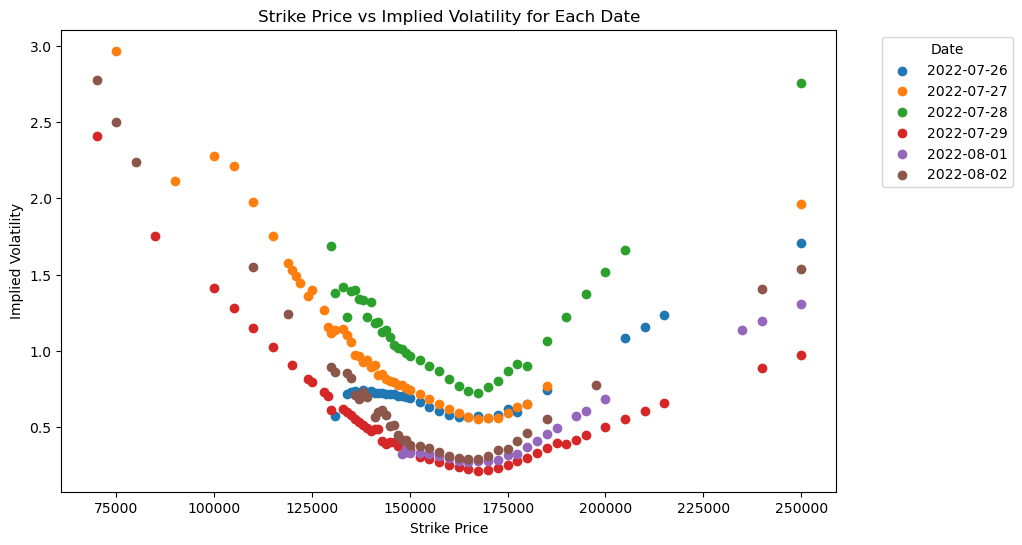

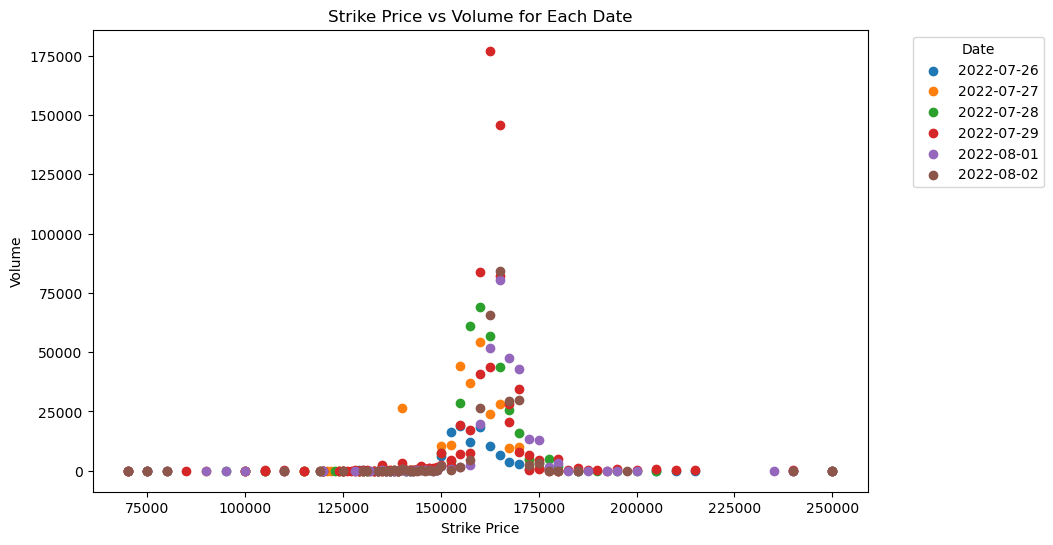

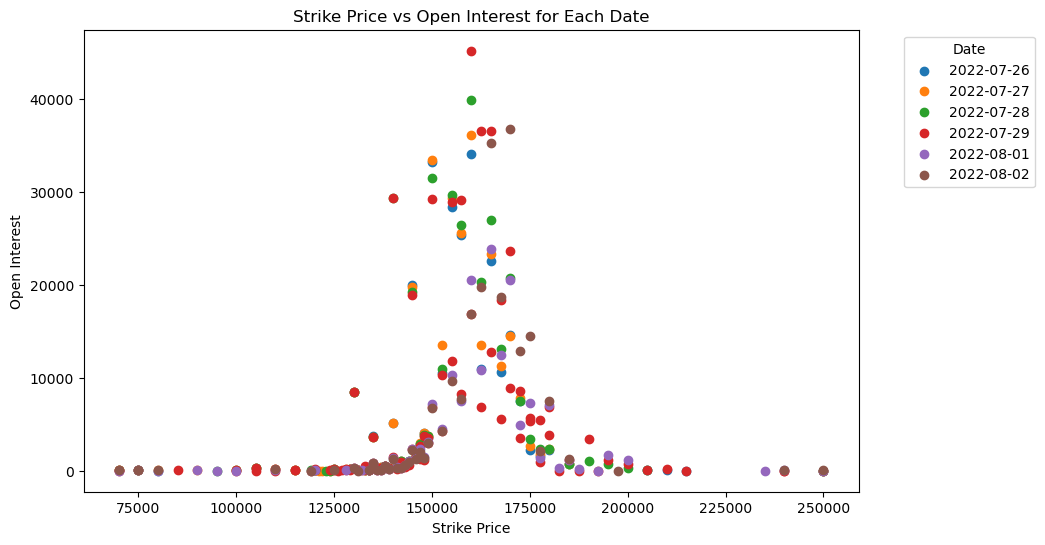

In [46]:
grouped = df_earn.groupby('date')

fig, ax = plt.subplots(figsize=(10, 6))

for name, group in grouped:
    ax.scatter(group['strike_price'], group['impl_volatility'], label=pd.to_datetime(name).date())

ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied Volatility')
ax.set_title('Strike Price vs Implied Volatility for Each Date')
ax.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

for name, group in grouped:
    ax.scatter(group['strike_price'], group['volume'], label=pd.to_datetime(name).date())

ax.set_xlabel('Strike Price')
ax.set_ylabel('Volume')
ax.set_title('Strike Price vs Volume for Each Date')
ax.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

for name, group in grouped:
    ax.scatter(group['strike_price'], group['open_interest'], label=pd.to_datetime(name).date())

ax.set_xlabel('Strike Price')
ax.set_ylabel('Open Interest')
ax.set_title('Strike Price vs Open Interest for Each Date')
ax.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [43]:
df_earn[df_earn['date']=='2022-07-27'].sort_values(by='strike_price')

,date,secid,symbol,cp_flag,expiry_indicator,volume,strike_price,exdate,open_interest,impl_volatility,best_bid,best_offer,delta,gamma,vega,theta
162742,2022-07-27,101594.0,AAPL 220729C70000,C,w,20.0,70000.0,2022-07-29,41.0,NaN,86.75,86.85,NaN,NaN,NaN,NaN
162743,2022-07-27,101594.0,AAPL 220729C75000,C,w,24.0,75000.0,2022-07-29,36.0,2.966561,81.75,81.85,0.999738,0.000028,0.011243,-4.451744
162744,2022-07-27,101594.0,AAPL 220729C80000,C,w,39.0,80000.0,2022-07-29,59.0,NaN,76.75,76.90,NaN,NaN,NaN,NaN
162745,2022-07-27,101594.0,AAPL 220729C90000,C,w,12.0,90000.0,2022-07-29,37.0,2.110402,66.65,66.95,0.999860,0.000022,0.006264,-2.887186
162696,2022-07-27,101594.0,AAPL 220729C100000,C,w,11.0,100000.0,2022-07-29,34.0,2.278805,56.65,57.00,0.997040,0.000342,0.105462,-23.700980
162697,2022-07-27,101594.0,AAPL 220729C105000,C,w,17.0,105000.0,2022-07-29,296.0,2.213494,51.70,52.00,0.994305,0.000633,0.188860,-40.054100
162698,2022-07-27,101594.0,AAPL 220729C110000,C,w,1.0,110000.0,2022-07-29,207.0,1.977586,46.70,47.00,0.993719,0.000773,0.205703,-39.171140
162699,2022-07-27,101594.0,AAPL 220729C115000,C,w,25.0,115000.0,2022-07-29,91.0,1.750873,41.70,42.00,0.993018,0.000958,0.225626,-38.226460
162700,2022-07-27,101594.0,AAPL 220729C119000,C,w,24.0,119000.0,2022-07-29,8.0,1.575369,37.70,38.00,0.992347,0.001155,0.244672,-37.415230
162701,2022-07-27,101594.0,AAPL 220729C120000,C,w,37.0,120000.0,2022-07-29,61.0,1.532236,36.70,37.00,0.992160,0.001213,0.249980,-37.203270


***
***